In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import xgboost as xgb
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv("PJME_hourly.csv")
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

In [4]:
color_pal = sns.color_palette()

<Axes: title={'center': 'PJME energy consumption HRL'}, xlabel='Datetime'>

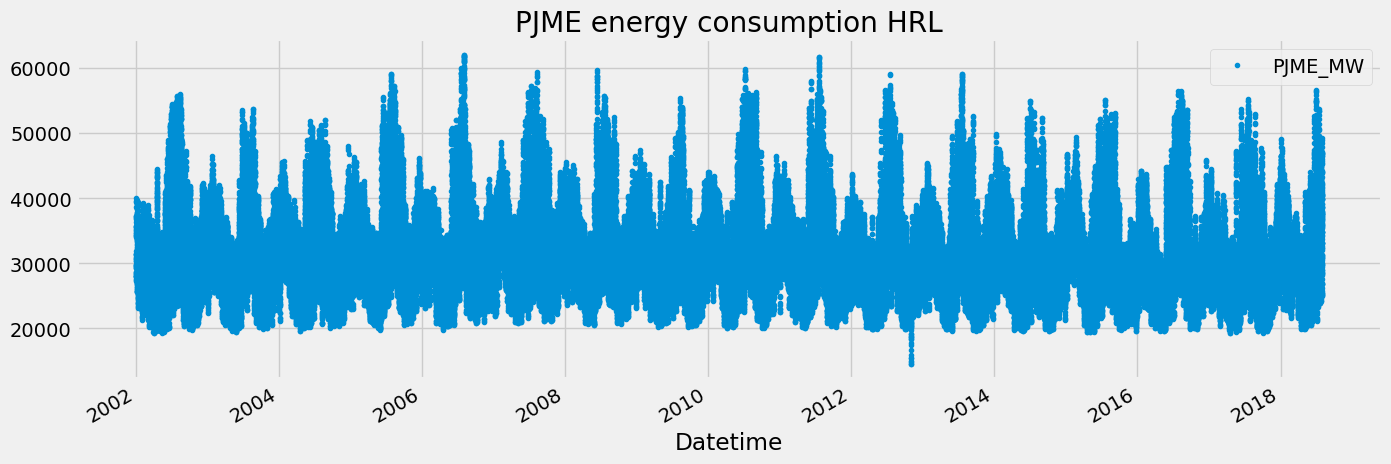

In [5]:
df.plot(style = '.', figsize=(15,5), color= color_pal[0], title="PJME energy consumption HRL"  )

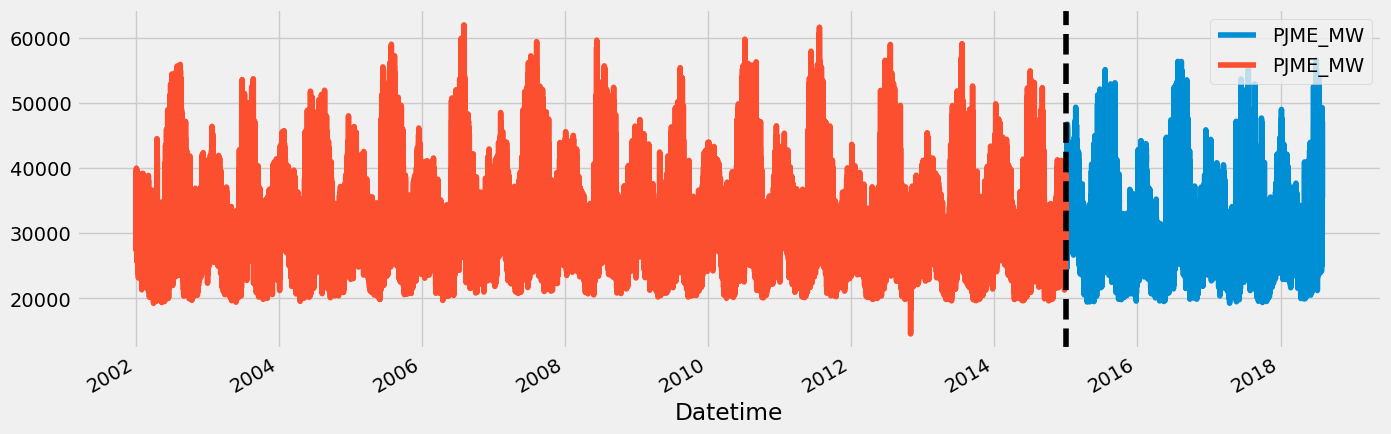

In [6]:
train = df.loc[df.index > '01-01-2015']
test = df.loc[df.index <= '01-01-2015']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label= 'training set')
test.plot(ax=ax, label = 'testing set')
ax.axvline('01-01-2015', color='black', ls='--')
plt.show()

<Axes: xlabel='Datetime'>

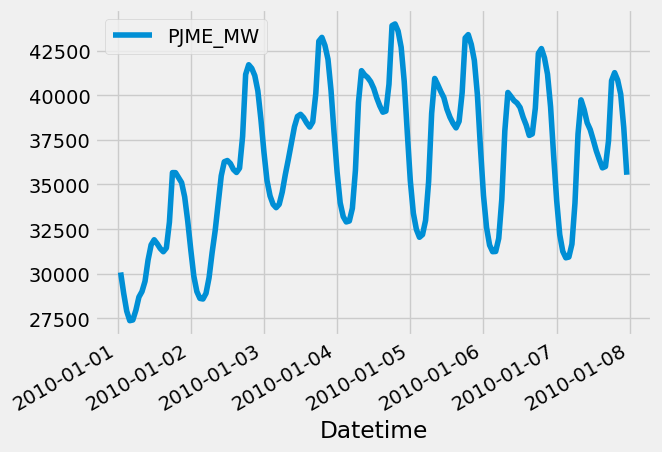

In [7]:
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')].plot()

In [26]:
def create_features(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    return df
    df = create_features(df)

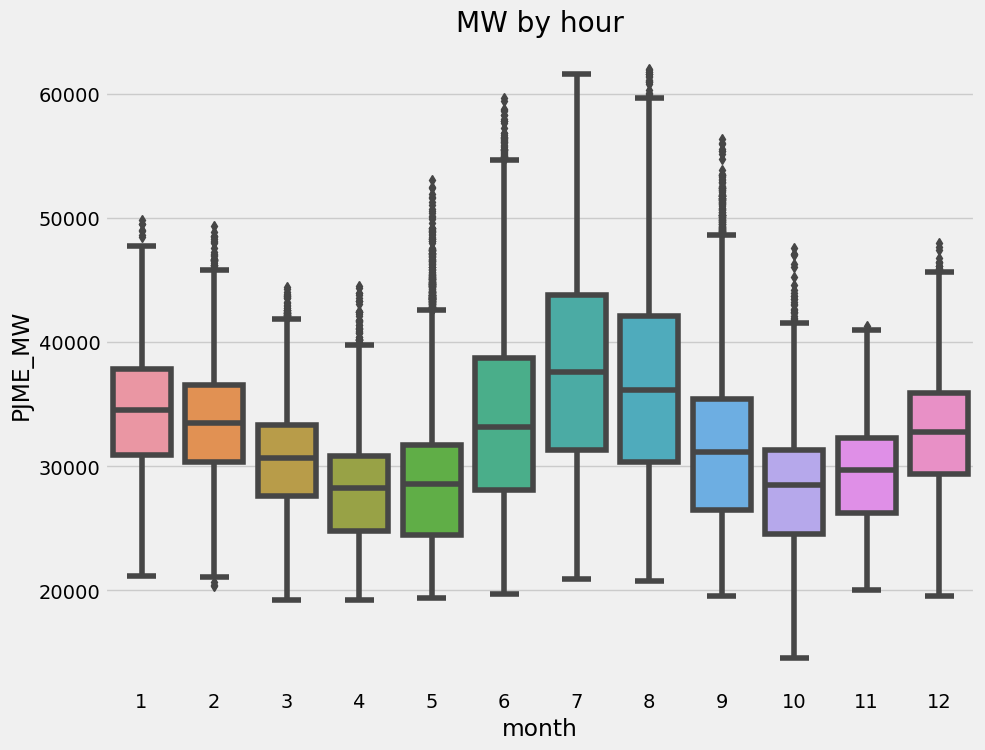

In [27]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data= df, x='month', y='PJME_MW')
ax.set_title('MW by hour')
plt.show()

In [78]:
train = create_features(train)
test = create_features(test)

FEATURES = ['hour', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear']
TARGET = 'PJME_MW'
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [79]:
reg = xgb.XGBRegressor(n_estimators=1000,early_stopping_rounds=50, learning_rate=0.01)
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=100)

[0]	validation_0-rmse:6405.86643	validation_1-rmse:6480.97260
[100]	validation_0-rmse:3944.53892	validation_1-rmse:4259.99767
[200]	validation_0-rmse:3260.47214	validation_1-rmse:3808.43053
[300]	validation_0-rmse:2956.83482	validation_1-rmse:3730.36059
[400]	validation_0-rmse:2779.67395	validation_1-rmse:3740.39756
[407]	validation_0-rmse:2762.75855	validation_1-rmse:3744.12901


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

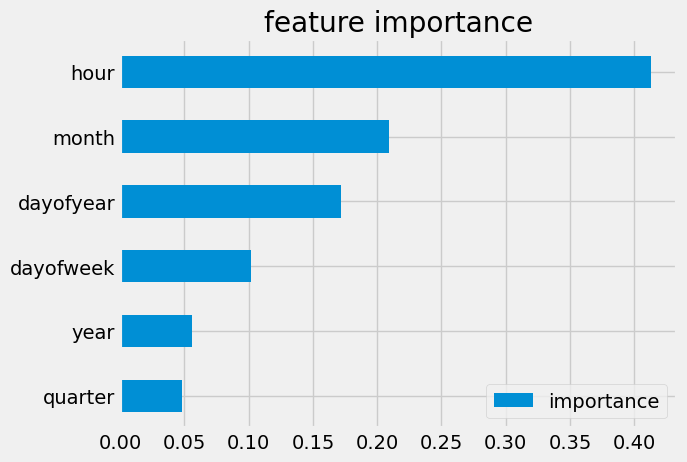

In [80]:
Fi= pd.DataFrame(data= reg.feature_importances_,
             index = reg.feature_names_in_,
columns=['importance'])
Fi.sort_values('importance').plot(kind='barh', title='feature importance')
plt.show()
 


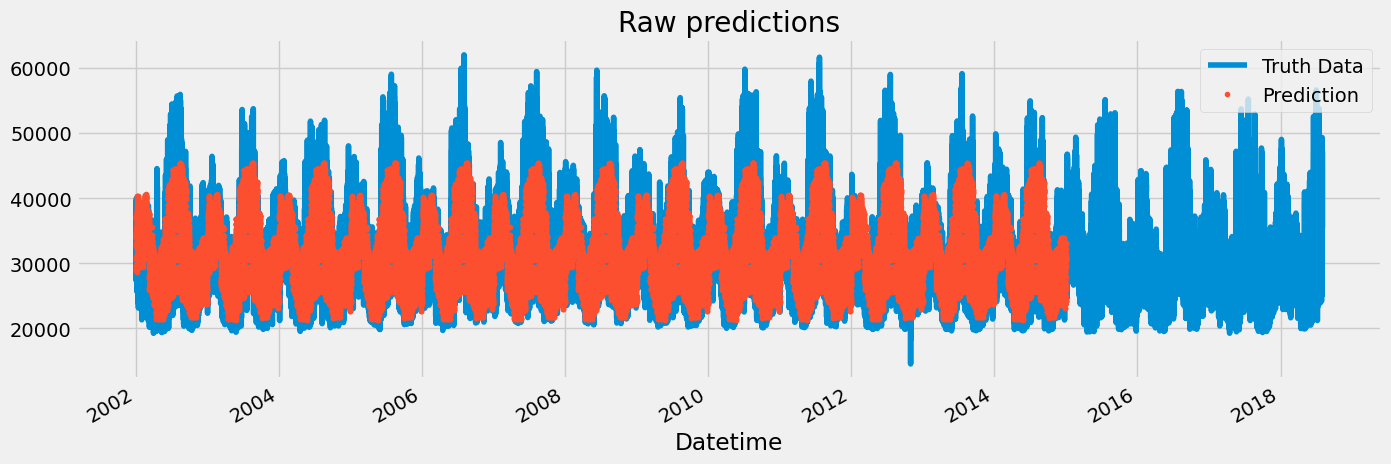

In [100]:
test['predictions'] = reg.predict(X_test) 
df= df.merge(test[['predictions']] , how='left', left_index=True, right_index=True)
ax=df[['PJME_MW']].plot(figsize=(15,5))
df['predictions'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Prediction'])
ax.set_title('Raw predictions')

plt.show()
